# Import Modules

In [1]:
import os
import pandas as pd
import numpy.random as rnd
from dotenv import load_dotenv
import requests
import warnings
import json
import sqlalchemy as sql
from pathlib import Path
import datetime
import yfinance as yf
from MCForecastTools import MCSimulation
warnings.filterwarnings('ignore')

#warnings.filterwarnings("ignore")
#pd.options.display.float_format = '{:.4%}'.format

# Client Input Module

In [2]:
## Function to assess client risk profile
from clientprofile.client_risk_profile import client_risk_tolerance
client_risk = client_risk_tolerance()
print(f'Your risk factor is {client_risk}')
#type(client_risk)

A. On a scale of 1(Risky Avoidant) - 4(Risky), how would your closest friend describe your risk tolerance? 5


Please enter a valid input


A. On a scale of 1(Risky Avoidant) - 4(Risky), how would your closest friend describe your risk tolerance? 3
B. On a scale of 1(Risky Avoidant) - 4(Risky), how would you describe your risk tolerance? 4
C. What would you rather:1. Take $1,000 in cash  2. A 50% chance at winning $5,000  3. A 25% chance at winning $10,000  4. A 5% chance at winning $100,000   5


Please enter a valid input


C. What would you rather:1. Take $1,000 in cash  2. A 50% chance at winning $5,000  3. A 25% chance at winning $10,000  4. A 5% chance at winning $100,000   3
D. Define risk: 1. Loss 2. Uncertainty 3. Opportunity 4. Thrill  3
E. How comfortable on a scale of 1(Not Comfortable) - 4(Very Comfortable)are you with investing your money into stocks? 4


Your risk factor is 0.85


In [3]:
print(client_risk)

0.85


In [4]:
#### Client input for their investment horizon. 
investment_timeframe = input("What is the desired timeframe(in # of years) for your investment?")
investment_timeframe = int(investment_timeframe)

What is the desired timeframe(in # of years) for your investment? 5


# Data Input for Universe (Multiple Asset Classes)

In [5]:
# Date range
today = datetime.date.today()
start_date = today - datetime.timedelta(days=365*5) #trading days(252) * amount of years to go back 

start = start_date.strftime("%Y-%m-%d")
end = today.strftime("%Y-%m-%d")

# Tickers of assets
assets = ["XLC", "XLY", "XLP", "XLE", "XLF", "XLV", "XLI", "XLB", "XLRE", "XLK", "XLU", "AAPL", "MSFT", "NVDA", "AMZN", "BRK-B",
         "GOOG", "META", "UNH", "XOM", "AGG", "BND", "LQD", "VCIT", "BNDX", "TMF", "TLT", "ICVT", "LKOR", "FBND"]
assets.sort()

# Downloading data
og_data = yf.download(assets, start = start, end = end)
data = og_data.loc[:,('Adj Close', slice(None))]
data.columns = assets

Y = data[assets].pct_change().dropna()

display(start)
display(end)
display(Y)

[*********************100%***********************]  30 of 30 completed


'2018-05-11'

'2023-05-10'

,AAPL,AGG,AMZN,BND,BNDX,BRK-B,FBND,GOOG,ICVT,LKOR,...,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-20,0.004362,-0.001887,0.008820,-0.002277,0.000183,-0.004465,-0.001636,0.001524,0.006899,-0.009009,...,0.004416,-0.002560,0.000683,0.002100,0.000979,0.010794,0.000797,0.002121,0.004741,-0.003098
2018-06-21,-0.005577,0.000284,-0.011348,0.000507,0.000366,-0.003377,0.000041,-0.010412,-0.009169,-0.001414,...,-0.018516,-0.002932,-0.012555,-0.007684,0.001957,0.005967,0.003384,-0.005762,-0.007123,-0.009447
2018-06-22,-0.002912,0.000945,-0.008409,0.000633,0.000183,0.000265,0.001188,-0.001883,-0.008748,-0.003035,...,0.019951,-0.004780,0.003455,-0.003238,0.008201,0.008742,0.006944,0.004494,-0.001704,0.021207
2018-06-25,-0.014871,-0.000567,-0.030612,-0.000126,-0.001644,-0.011540,0.000921,-0.026543,-0.014783,0.000000,...,-0.020093,-0.010713,-0.012670,-0.020763,0.005036,-0.002476,0.016552,-0.009184,-0.021739,-0.020152
2018-06-26,0.012406,0.001606,0.016799,0.001647,0.000000,-0.001553,0.000307,-0.005645,0.001395,0.005479,...,0.012629,-0.003361,0.003766,0.004039,-0.004240,0.005275,0.001163,-0.003090,0.007163,0.011287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-03,-0.006467,0.004415,0.000193,0.004197,-0.000815,-0.008102,0.003038,0.001321,-0.000565,-0.001233,...,-0.018880,-0.011445,-0.003819,-0.008427,-0.008151,-0.006257,-0.002784,-0.001347,-0.007915,-0.019709
2023-05-04,-0.009913,-0.001199,0.003377,-0.001348,0.000204,-0.009962,-0.000649,-0.008575,-0.001273,-0.005599,...,-0.011141,-0.012829,-0.010897,-0.004789,-0.002479,0.009307,0.007639,-0.007943,-0.007703,-0.017511
2023-05-05,0.046927,-0.003201,0.015962,-0.003645,-0.003874,0.012125,-0.003247,0.009552,0.010905,-0.002298,...,0.027141,0.024723,0.015097,0.025078,0.009285,0.015460,0.006415,0.008988,0.020240,0.024896


In [6]:
display(og_data)

Adj Close                                                \
                  AAPL         AGG        AMZN        BND       BNDX   
Date                                                                   
2018-05-11   45.120022   93.888710   80.145500  69.422989  48.001522   
2018-05-14   45.014755   93.800018   80.077003  69.335030  47.931133   
2018-05-15   44.605633   93.383202   78.806000  69.009636  47.834328   
2018-05-16   45.021931   93.276733   79.363998  68.956818  47.834328   
2018-05-17   44.737232   93.152588   79.087997  68.895287  47.790325   
...                ...         ...         ...        ...        ...   
2023-05-03  167.449997  100.089996  103.650002  74.169998  49.029999   
2023-05-04  165.789993   99.970001  104.000000  74.070000  49.040001   
2023-05-05  173.570007   99.650002  105.660004  73.800003  48.849998   
2023-05-08  173.500000   99.099998  105.830002  73.449997  48.740002   
2023-05-09  171.770004   99.010002  106.620003  73.370003  48.709999   

                                                                     ...  \
                 BRK-B       FBND        GOOG       ICVT       LKOR  ...   
Date                                                                 ...   
2018-05-11  199.300003  41.902031   54.912998  47.299885  40.864700  ...   
2018-05-14  199.179993  41.936405   55.009998  47.381847  40.740227  ...   
2018-05-15  197.360001  41.738686   53.961498  47.349037  40.323174  ...   
2018-05-16  197.830002  41.781654   54.088501  47.603149  40.177696  ...   
2018-05-17  197.490005  41.730083   53.929501  47.496590  40.080708  ...   
...                ...        ...         ...        ...        ...  ...   
2023-05-03  323.220001  46.230000  106.120003  70.699997  43.759998  ...   
2023-05-04  320.000000  46.200001  105.209999  70.610001  43.514999  ...   
2023-05-05  323.880005  46.049999  106.214996  71.379997  43.415001  ...   
2023-05-08  326.140015  45.820000  108.239998  71.709999  42.919998  ...   
2023-05-09  324.869995  45.779999  107.940002  71.639999  42.909000  ...   

              Volume                                                   \
                 XLE       XLF       XLI       XLK       XLP     XLRE   
Date                                                                    
2018-05-11  12010700  25894000   8060000   8760600  10065200  1206700   
2018-05-14  10226300  31292900   5856600  10130900   6708100  1882900   
2018-05-15  10482700  54655800  10180500  14262600  22686900  2371100   
2018-05-16  11997200  31984900   6281300   6680500  12151300  1562100   
2018-05-17  16271300  45070400   7519500  10800100  19572900  1758200   
...              ...       ...       ...       ...       ...      ...   
2023-05-03  29683800  65642400  13371600   5815100  11656600  6140700   
2023-05-04  26430500  76076600  15150000   5430500  11682600  4887800   
2023-05-05  19533600  54989500   9231300   6114200  10479100  3265100   
2023-05-08  16355900  34323600   7610200   3397800   8069200  3358700   
2023-05-09  20706300  29729400   8068100   6236600   6939500  2995000   

                                                   
                 XLU       XLV      XLY       XOM  
Date                                               
2018-05-11   6478900  10434000  4424100  14751000  
2018-05-14   8512800  11837600  3324900  11852100  
2018-05-15  11070700   8806800  4558000  12595700  
2018-05-16  13541300   7013600  3239200   9570000  
2018-05-17  11276000   6610400  6364500  11224100  
...              ...       ...      ...       ...  
2023-05-03  11857200   8961500  4256000  16212300  
2023-05-04  14631100   9625300  5331500  17177200  
2023-05-05  11416600   7650300  3685900  14964700  
2023-05-08   8286700   5305700  3425000  11187800  
2023-05-09  10281100   6452700  4232500  11369900  

[1257 rows x 180 columns]

In [ ]:
# Client Scaling Factor

This code was added to ensure that the calculation from the client had a risk aversion factor between 0 and 1, where 0 is highly risk


In [7]:
# Client fear factor scaling. necessary as porfolio optimization solution uses an logarithmic estimation
x = client_risk

if (x >= 0) and (x < 0.25):
    fear_factor = 10000
    print(f'Client risk aversion is: {fear_factor}')

elif (x >= 0.25) and (x < 0.5):
        fear_factor = 3500
        print(f'Client risk aversion is: {fear_factor}')
elif (x >= 0.5) and (x <= 0.75):
        fear_factor = 2.5
        print(f'Client risk aversion is: {fear_factor}')
else:
    if (x >= 0.75) and (x <= 1):
        fear_factor = 0
        print(f'Client risk aversion is: {fear_factor}')
    else:
        print(f"Number isn't between 0 and 1")
       

Client risk aversion is: 0


# Portfolio Optimization using Risk Parity Model

In [8]:
import riskfolio as rp
#pd.options.display.float_format = '{:.4%}'.format

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Utility' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = fear_factor # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,AAPL,AGG,AMZN,BND,BNDX,BRK-B,FBND,GOOG,ICVT,LKOR,...,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,XOM
weights,8.104981e-09,1.072880e-08,1.436562e-08,1.073225e-08,1.047462e-08,1.563966e-08,1.096414e-08,1.782772e-08,1.383113e-08,1.109656e-08,...,1.554469e-08,1.357317e-08,1.437707e-08,1.920328e-08,1.509126e-08,1.380324e-08,1.493695e-08,1.520182e-08,1.398923e-08,1.757118e-08


# Optimal Portfolio

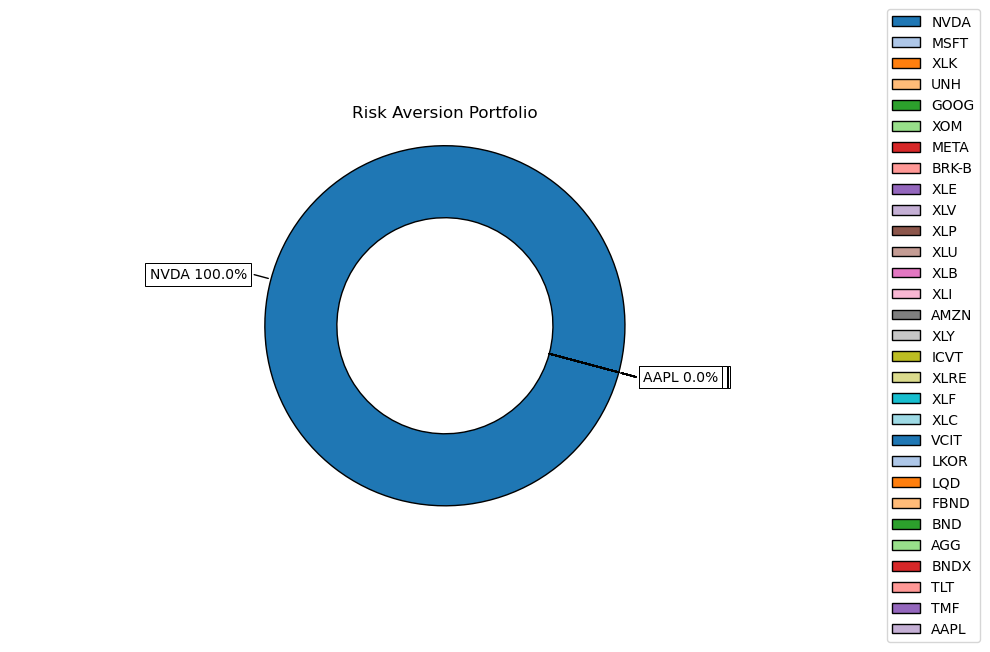

In [9]:
ax = rp.plot_pie(w=w, title='Risk Aversion Portfolio', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

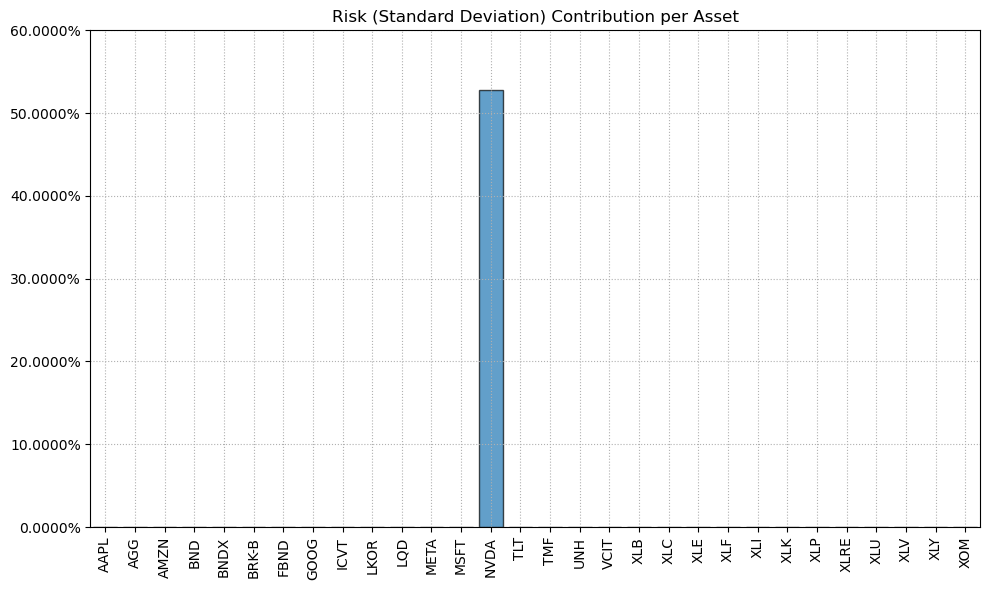

In [10]:
ax = rp.plot_risk_con(w, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                      color="tab:blue", height=6, width=10, ax=None)

In [11]:
# used to save weights to a csv file
#w.to_csv(Path("w.csv"))

# Portfolio Optimization (Assuming uniformly distributed risk across all assets)

In [12]:
b = None # Risk contribution constraints vector

w_rp = port.rp_optimization(model=model, rm=rm, rf=rf, b=b, hist=hist)

display(w.T)

,AAPL,AGG,AMZN,BND,BNDX,BRK-B,FBND,GOOG,ICVT,LKOR,...,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,XOM
weights,8.104981e-09,1.072880e-08,1.436562e-08,1.073225e-08,1.047462e-08,1.563966e-08,1.096414e-08,1.782772e-08,1.383113e-08,1.109656e-08,...,1.554469e-08,1.357317e-08,1.437707e-08,1.920328e-08,1.509126e-08,1.380324e-08,1.493695e-08,1.520182e-08,1.398923e-08,1.757118e-08


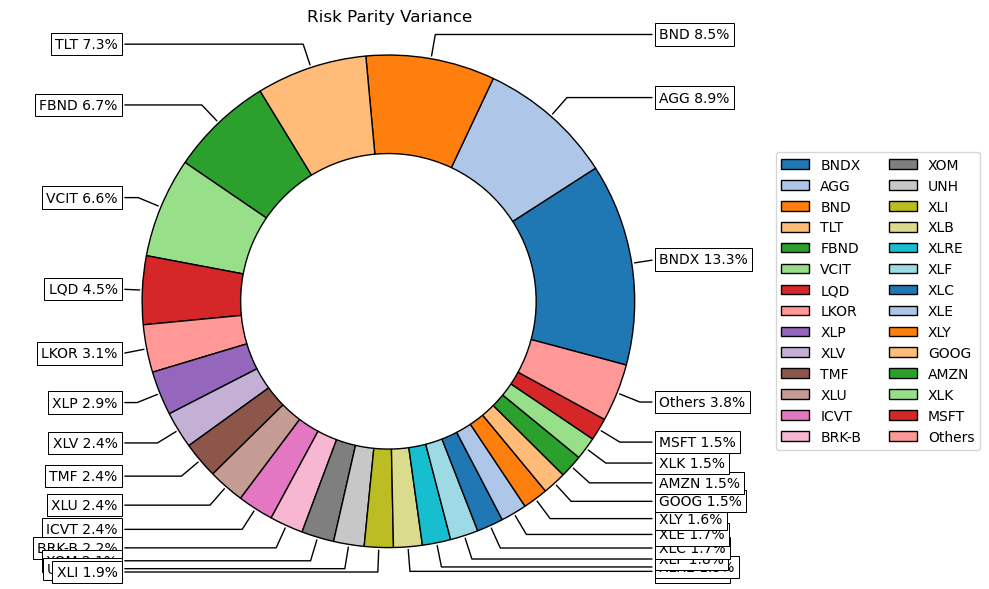

In [13]:
ax = rp.plot_pie(w=w_rp, title='Risk Parity Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

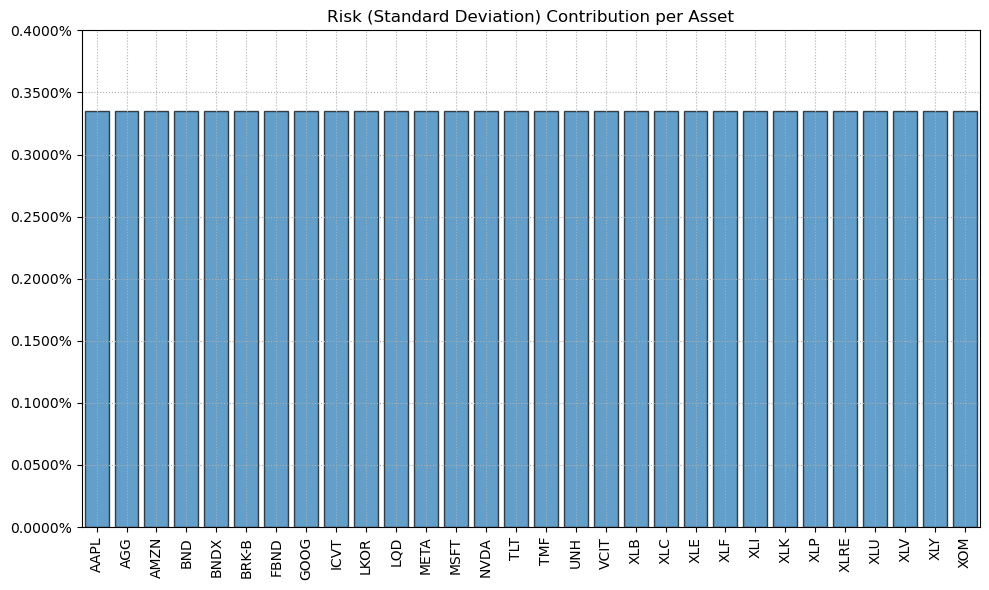

In [22]:
ax = rp.plot_risk_con(w_rp, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                      color="tab:blue", height=6, width=10, ax=None)

# Monte Carlo Simulation

In [14]:
#Read the csv created from the risk parity module and create a dataframe with the tickers and weights in the portfolio


#portfolio_path = Path("w.csv")
#portfolio_df = pd.read_csv(portfolio_path)
#display(w)
portfolio_df = w
portfolio_df = portfolio_df.reset_index()
portfolios_headers = ["Ticker", "Weight"]
portfolio_df.columns = portfolios_headers
portfolio_df['Weight'] = portfolio_df['Weight'].apply(lambda x: "{:.10f}".format(x))
portfolio_df['Weight'] = portfolio_df['Weight'].astype(float)
portfolio_df.head()

,Ticker,Weight
0,AAPL,8.100000e-09
1,AGG,1.070000e-08
2,AMZN,1.440000e-08
3,BND,1.070000e-08
4,BNDX,1.050000e-08


In [15]:
#Creating lists of tickers and weights to be used in the Monte Carlo simulation

tickers = portfolio_df["Ticker"].tolist()
weights_list = portfolio_df["Weight"].tolist()
weights_list

# test to ensure weights are float
#for i in weights_list:
   # print(type(i))
    

[8.1e-09,
 1.07e-08,
 1.44e-08,
 1.07e-08,
 1.05e-08,
 1.56e-08,
 1.1e-08,
 1.78e-08,
 1.38e-08,
 1.11e-08,
 1.11e-08,
 1.58e-08,
 2e-08,
 0.999999599,
 1.04e-08,
 9.4e-09,
 1.88e-08,
 1.11e-08,
 1.45e-08,
 1.28e-08,
 1.55e-08,
 1.36e-08,
 1.44e-08,
 1.92e-08,
 1.51e-08,
 1.38e-08,
 1.49e-08,
 1.52e-08,
 1.4e-08,
 1.76e-08]

In [16]:
#Getting the open, close and daily return for the tickers in the portfolio and creating a dataframe with the data

dfs = []

for ticker in tickers:
    data = yf.download(ticker, start, interval='1d')
    open_df = pd.DataFrame(data['Open']).rename(columns={'Open': 'open'})
    adj_close_df = pd.DataFrame(data['Adj Close']).rename(columns={'Adj Close': 'close'})
    daily_return_df = pd.DataFrame(data['Adj Close'].pct_change()).rename(columns={'Adj Close': 'daily_return'})
    dfs.append(pd.concat([open_df, adj_close_df, daily_return_df], axis=1, keys=[ticker]*3))

data = pd.concat(dfs, axis=1)
data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

AAPL                                  AGG             \
                  open       close daily_return        open      close   
Date                                                                     
2018-05-11   47.372501   45.120022          NaN  105.900002  93.888733   
2018-05-14   47.252499   45.014755    -0.002333  105.790001  93.800041   
2018-05-15   46.695000   44.605633    -0.009089  105.489998  93.383194   
2018-05-16   46.517502   45.021931     0.009333  105.360001  93.276794   
2018-05-17   47.000000   44.737228    -0.006324  105.190002  93.152618   
...                ...         ...          ...         ...        ...   
2023-05-04  164.889999  165.789993    -0.009913   99.769997  99.970001   
2023-05-05  170.979996  173.570007     0.046927   99.639999  99.650002   
2023-05-08  172.479996  173.500000    -0.000403   99.209999  99.099998   
2023-05-09  173.050003  171.770004    -0.009971   99.110001  99.010002   
2023-05-10  173.020004  173.330002     0.009082   99.430000  99.459999   

                               AMZN                                 BND  ...  \
           daily_return        open       close daily_return       open  ...   
Date                                                                     ...   
2018-05-11          NaN   80.549500   80.145500          NaN  78.930000  ...   
2018-05-14    -0.000945   80.199997   80.077003    -0.000855  78.849998  ...   
2018-05-15    -0.004444   79.389999   78.806000    -0.015872  78.610001  ...   
2018-05-16    -0.001139   78.875000   79.363998     0.007081  78.489998  ...   
2018-05-17    -0.001331   79.028000   79.087997    -0.003478  78.400002  ...   
...                 ...         ...         ...          ...        ...  ...   
2023-05-04    -0.001199  104.040001  104.000000     0.003377  73.919998  ...   
2023-05-05    -0.003201  104.269997  105.660004     0.015962  73.809998  ...   
2023-05-08    -0.005519  105.040001  105.830002     0.001609  73.500000  ...   
2023-05-09    -0.000908  105.480003  106.620003     0.007465  73.430000  ...   
2023-05-10     0.004545  108.099998  109.740097     0.029264  73.680000  ...   

                    XLU         XLV                                  XLY  \
           daily_return        open       close daily_return        open   
Date                                                                       
2018-05-11          NaN   81.879997   76.185478          NaN  104.680000   
2018-05-14    -0.003771   83.180000   76.690178     0.006625  105.050003   
2018-05-15    -0.008368   83.029999   75.699196    -0.012922  104.529999   
2018-05-16    -0.007836   82.459999   76.121277     0.005576  104.610001   
2018-05-17    -0.008100   82.879997   76.148804     0.000362  105.120003   
...                 ...         ...         ...          ...         ...   
2023-05-04     0.007639  132.899994  132.399994    -0.007943  145.410004   
2023-05-05     0.006415  133.270004  133.589996     0.008988  145.630005   
2023-05-08    -0.003042  133.389999  133.300003    -0.002171  147.639999   
2023-05-09    -0.001308  132.789993  132.410004    -0.006677  146.880005   
2023-05-10     0.005238  132.789993  132.389999    -0.000151  149.009995   

                                            XOM                           
                 close daily_return        open       close daily_return  
Date                                                                      
2018-05-11   99.585091          NaN   81.180000   63.287735          NaN  
2018-05-14   99.775002     0.001907   81.699997   63.716003     0.006767  
2018-05-15   99.195816    -0.005805   81.849998   63.684849    -0.000489  
2018-05-16  100.021820     0.008327   81.760002   63.863930     0.002812  
2018-05-17   99.689529    -0.003322   82.199997   63.754913    -0.001707  
...                ...          ...         ...         ...          ...  
2023-05-04  144.270004    -0.007703  107.900002  106.040001    -0.017511  
2023-05-05  147.190002     0.020240  108.5500

In [17]:
#setting the inputs for the Monte Carlo simulation

thirty_year_simulation = MCSimulation(
    portfolio_data=data,
    weights=weights_list,   
    num_simulation=10,
    num_trading_days=252*investment_timeframe
)


thirty_year_simulation.portfolio_data.head()


AAPL                                 AGG             \
                 open      close daily_return        open      close   
Date                                                                   
2018-05-11  47.372501  45.120022          NaN  105.900002  93.888733   
2018-05-14  47.252499  45.014755    -0.002333  105.790001  93.800041   
2018-05-15  46.695000  44.605633    -0.009089  105.489998  93.383194   
2018-05-16  46.517502  45.021931     0.009333  105.360001  93.276794   
2018-05-17  47.000000  44.737228    -0.006324  105.190002  93.152618   

                              AMZN                                BND  ...  \
           daily_return       open      close daily_return       open  ...   
Date                                                                   ...   
2018-05-11          NaN  80.549500  80.145500          NaN  78.930000  ...   
2018-05-14    -0.000945  80.199997  80.077003    -0.000855  78.849998  ...   
2018-05-15    -0.004444  79.389999  78.806000    -0.015872  78.610001  ...   
2018-05-16    -0.001139  78.875000  79.363998     0.007081  78.489998  ...   
2018-05-17    -0.001331  79.028000  79.087997    -0.003478  78.400002  ...   

                    XLU        XLV                                 XLY  \
           daily_return       open      close daily_return        open   
Date                                                                     
2018-05-11          NaN  81.879997  76.185478          NaN  104.680000   
2018-05-14    -0.003771  83.180000  76.690178     0.006625  105.050003   
2018-05-15    -0.008368  83.029999  75.699196    -0.012922  104.529999   
2018-05-16    -0.007836  82.459999  76.121277     0.005576  104.610001   
2018-05-17    -0.008100  82.879997  76.148804     0.000362  105.120003   

                                           XOM                          
                 close daily_return       open      close daily_return  
Date                                                                    
2018-05-11   99.585091          NaN  81.180000  63.287735          NaN  
2018-05-14   99.775002     0.001907  81.699997  63.716003     0.006767  
2018-05-15   99.195816    -0.005805  81.849998  63.684849    -0.000489  
2018-05-16  100.021820     0.008327  81.760002  63.863930     0.002812  
2018-05-17   99.689529    -0.003322  82.199997  63.754913    -0.001707  

[5 rows x 90 columns]

In [18]:
thirty_year_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.


,0,1,2,3,4,5,6,7,8,9
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.942074,1.049168,0.971825,0.955934,1.026863,1.002006,1.037083,1.019473,0.997992,0.984218
2,0.914155,1.054062,0.910051,0.990949,0.985112,0.982030,0.982954,0.972559,1.037315,0.950043
3,0.868801,1.003703,0.903315,0.983784,1.040674,0.937583,0.977801,0.924304,1.040139,0.964030
4,0.876379,1.021288,0.892292,0.927807,1.065196,0.938254,0.939966,0.927142,0.974831,0.928710
...,...,...,...,...,...,...,...,...,...,...
1256,3.907835,1.370110,4.576470,9.258554,7.348364,1.825461,12.888034,2.325193,2.477321,30.063551
1257,3.938852,1.382613,4.612181,9.241971,7.413018,1.786389,13.740950,2.446720,2.396383,29.595827
1258,3.946712,1.270693,4.612271,9.343862,7.499545,1.816633,14.443947,2.532014,2.291878,30.963134
1259,3.682537,1.371461,4.741597,9.575207,7.486476,1.923991,14.038226,2.658292,2.301974,32.626004


<AxesSubplot:title={'center':'10 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

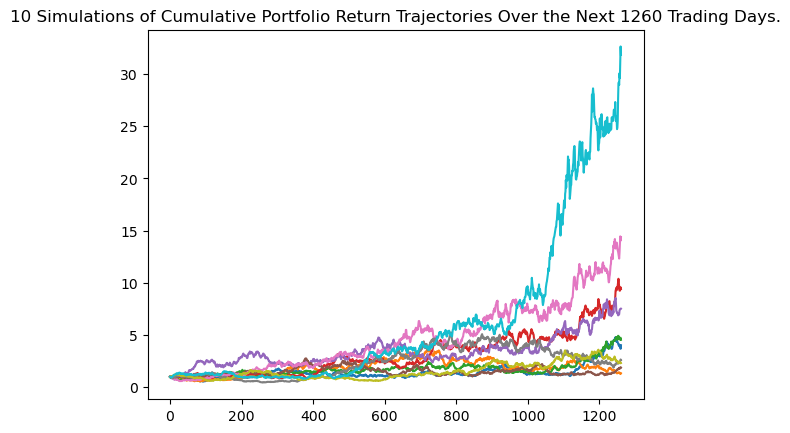

In [19]:
thirty_year_simulation.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 10 Simulations'}, ylabel='Frequency'>

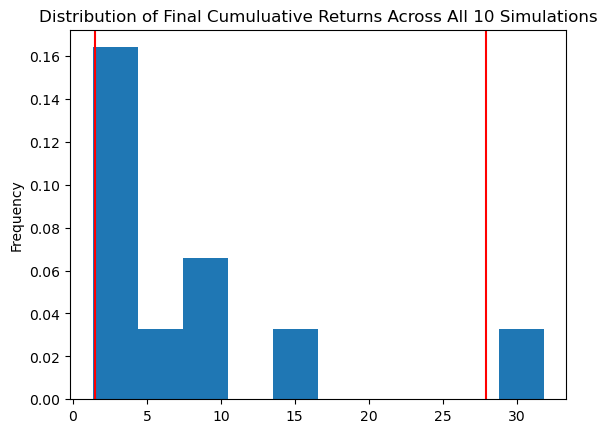

In [20]:
thirty_year_simulation.plot_distribution()

In [21]:
thirty_year_simulation_statistics = thirty_year_simulation.summarize_cumulative_return()
thirty_year_simulation_statistics

count           10.000000
mean             7.982745
std              9.316203
min              1.344298
25%              2.391717
50%              4.282653
75%              8.930289
max             31.830090
95% CI Lower     1.466488
95% CI Upper    27.896972
Name: 1260, dtype: float64